In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from yellowbrick.target import ClassBalance
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline

#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
#df=pandas.read_csv('drive/My Drive/NSL-KDD 2 Class.csv')
df=pandas.read_csv('drive/My Drive/NSL-KDD 5 Class.csv')

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,Dos,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [0]:
df.shape

(148516, 42)

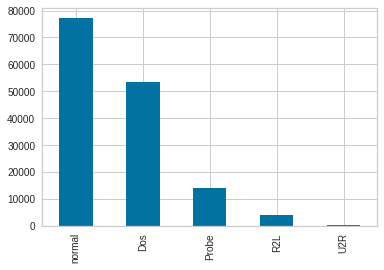

In [0]:
df['labels'].value_counts().plot(kind="bar");

In [0]:
df['labels'].value_counts()

normal    77053
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: labels, dtype: int64

In [0]:
df1=df[['flag', 'src_bytes', 'dst_bytes', 'logged_in','root_shell','srv_serror_rate','srv_serror_rate','same_srv_rate','diff_srv_rate','dst_host_diff_srv_rate','dst_host_srv_diff_host_rate','dst_host_srv_serror_rate','labels']]

In [0]:
df1.shape

(148516, 13)

In [0]:
df1.head()

,flag,src_bytes,dst_bytes,logged_in,root_shell,srv_serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,labels
0,SF,491,0,0,0,0.0,0.0,1.00,0.00,0.03,0.00,0.00,normal
1,SF,146,0,0,0,0.0,0.0,0.08,0.15,0.60,0.00,0.00,normal
2,S0,0,0,0,0,1.0,1.0,0.05,0.07,0.05,0.00,1.00,Dos
3,SF,232,8153,1,0,0.2,0.2,1.00,0.00,0.00,0.04,0.01,normal
4,SF,199,420,1,0,0.0,0.0,1.00,0.00,0.00,0.00,0.00,normal


In [0]:
df1['labels'].value_counts()

normal    77053
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: labels, dtype: int64

In [0]:
labels = df1['labels'].values

In [0]:
import numpy as np
classes = ["Dos","Probe","R2L","U2R","Normal"]
unique_val = np.array(labels)

  

print(classes)

['Dos', 'Probe', 'R2L', 'U2R', 'Normal']


In [0]:
#Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.

df1['labels']=le.fit_transform(df1['labels'])
#test['service']=le.fit_transform(test['service'])
df1['flag']=le.fit_transform(df1['flag'])
df1.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,flag,src_bytes,dst_bytes,logged_in,root_shell,srv_serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,labels
0,9,491,0,0,0,0.0,0.0,1.00,0.00,0.03,0.00,0.00,4
1,9,146,0,0,0,0.0,0.0,0.08,0.15,0.60,0.00,0.00,4
2,5,0,0,0,0,1.0,1.0,0.05,0.07,0.05,0.00,1.00,0
3,9,232,8153,1,0,0.2,0.2,1.00,0.00,0.00,0.04,0.01,4
4,9,199,420,1,0,0.0,0.0,1.00,0.00,0.00,0.00,0.00,4


In [0]:
df1['labels'].value_counts()

normal    77053
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: labels, dtype: int64

In [0]:
labels = df1['labels'].values

In [0]:
x = df1.drop("labels", axis=1)
y = df1["labels"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [0]:
 #Fitting k-NN on our scaled data set
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn import ensemble
  
 knn=KNeighborsClassifier(n_neighbors=5)
 knn.fit(x_train,y_train)
# Checking the model's accuracy
 accuracy_score(y_test,knn.predict(x_test))

0.9897654584221749

In [0]:
  index = ["Dos","Probe","R2L","U2R","Normal"]
  columns = ["Dos","Probe","R2L","U2R","Normal"]

In [0]:

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ["Dos","Probe","R2L","U2R","Normal"], 
                     columns = ["Dos","Probe","R2L","U2R","Normal"])

plt.figure(figsize=(8.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logestic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))



In [0]:
#print(classification_report(y_test, y_pred))

In [0]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
visualizer = ClassificationReport(model, support='percent',classes=classes)


visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9908427785882618


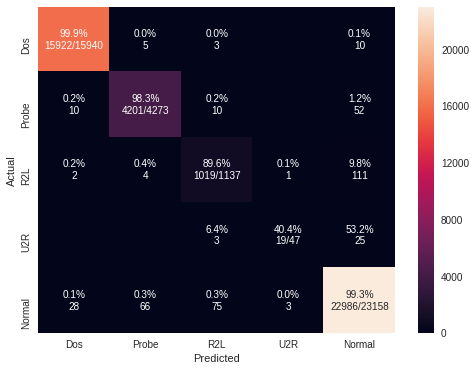

In [0]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()

visualizer = ClassificationReport(model, support='percent')
visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.991044776119403


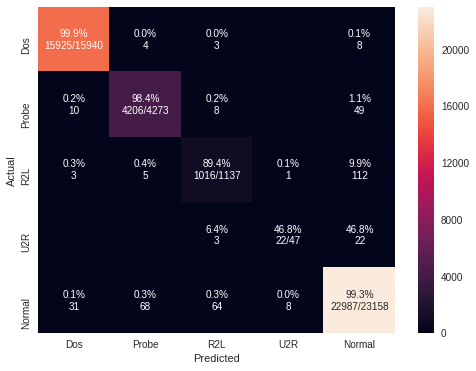

In [0]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()

visualizer = ClassificationReport(model, support='percent')
visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


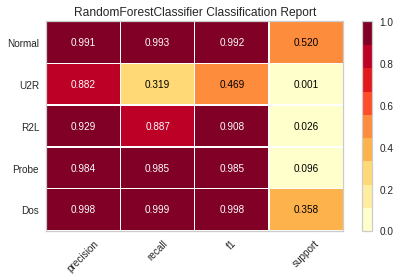

In [0]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()

#visualizer = ClassificationReport(model, support='percent')
visualizer = ClassificationReport(model, support='percent',classes=classes)


visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 


In [0]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))
print(classification_report(y_test, y_pred))

In [0]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes,support=True,classes=classes)

visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   





0.9897654584221749


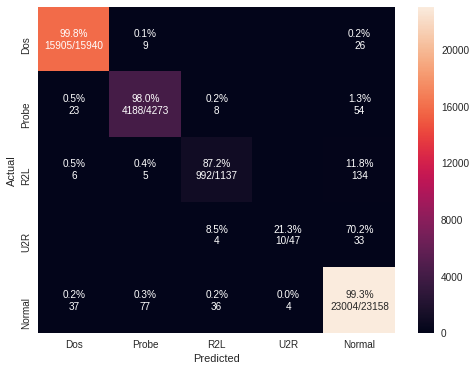

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15940
           1       0.98      0.98      0.98      4273
           2       0.95      0.87      0.91      1137
           3       0.71      0.21      0.33        47
           4       0.99      0.99      0.99     23158

   micro avg       0.99      0.99      0.99     44555
   macro avg       0.93      0.81      0.84     44555
weighted avg       0.99      0.99      0.99     44555



In [0]:
from sklearn import neighbors


model = neighbors.KNeighborsClassifier(n_neighbors=5)
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))
print(classification_report(y_test, y_pred))

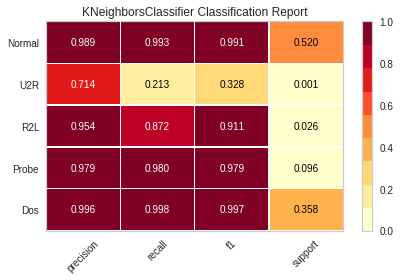

In [0]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier(n_neighbors=5)

visualizer = ClassificationReport(model, support='percent',classes=classes)


visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   

0.9903265626753451


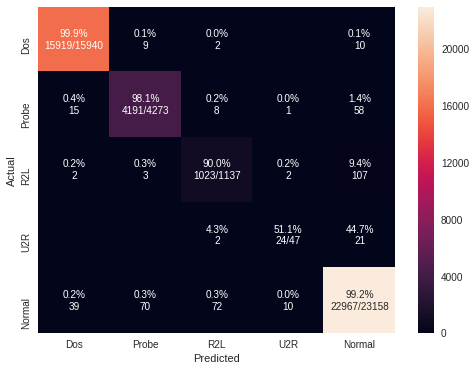

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15940
           1       0.98      0.98      0.98      4273
           2       0.92      0.90      0.91      1137
           3       0.65      0.51      0.57        47
           4       0.99      0.99      0.99     23158

   micro avg       0.99      0.99      0.99     44555
   macro avg       0.91      0.88      0.89     44555
weighted avg       0.99      0.99      0.99     44555



In [0]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

visualizer = ClassificationReport(model, support='percent',classes=classes)


visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))
print(classification_report(y_test, y_pred))

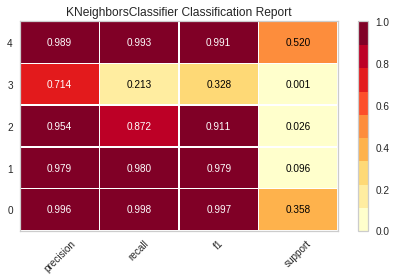

In [0]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()  

0.7034676242845921


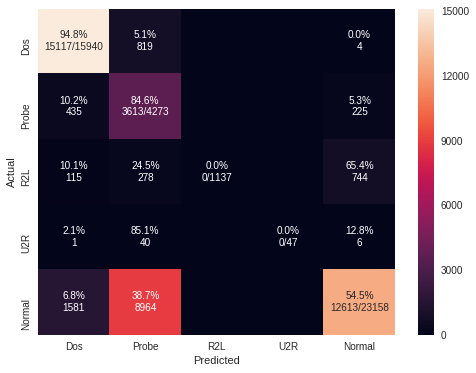

In [0]:

from sklearn.neural_network import MLPClassifier


model = MLPClassifier(hidden_layer_sizes=(60,60,60))
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


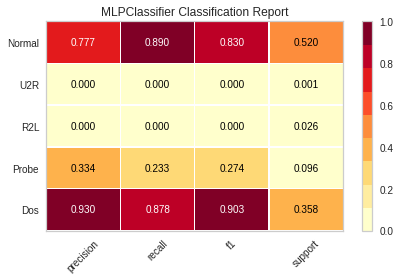

In [0]:

from sklearn.neural_network import MLPClassifier


model = MLPClassifier(hidden_layer_sizes=(60,60,60))
visualizer = ClassificationReport(model, support='percent')



visualizer = ClassificationReport(model, support='percent',classes=classes)


visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

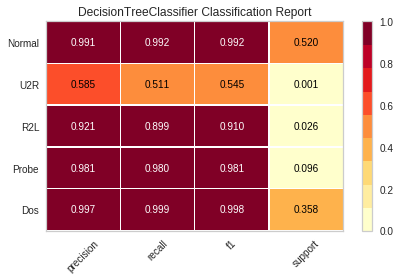

In [0]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

visualizer = ClassificationReport(model, support='percent',classes=classes)


visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9913814386713051


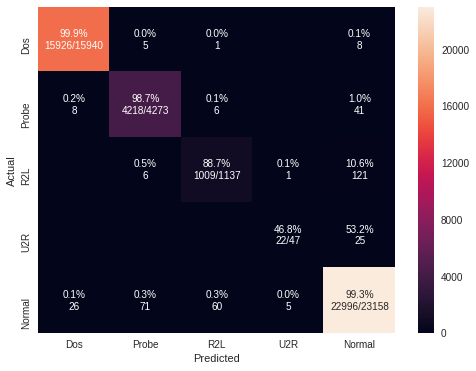

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15940
           1       0.98      0.99      0.98      4273
           2       0.94      0.89      0.91      1137
           3       0.79      0.47      0.59        47
           4       0.99      0.99      0.99     23158

   micro avg       0.99      0.99      0.99     44555
   macro avg       0.94      0.87      0.89     44555
weighted avg       0.99      0.99      0.99     44555



In [0]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()

visualizer = ClassificationReport(model, support='percent',classes=classes)
visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,6))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


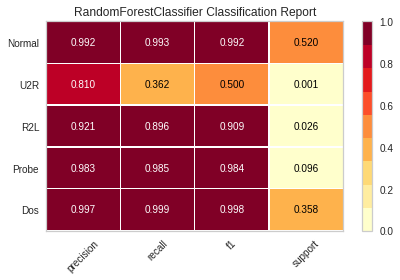

In [0]:
from sklearn import ensemble
from yellowbrick.classifier import ClassificationReport

model = ensemble.RandomForestClassifier()

visualizer = ClassificationReport(model, support='percent',classes=classes)


visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

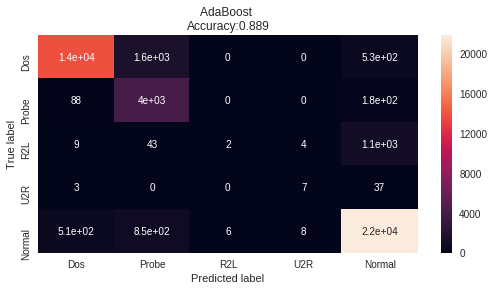

In [0]:
from sklearn import ensemble
model = ensemble.AdaBoostClassifier()

visualizer = ClassificationReport(model, support='percent')
visualizer.fit(x_train, y_train)
y_pred=visualizer.predict(x_test)

cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ["Dos","Probe","R2L","U2R","Normal"], 
                     columns = ["Dos","Probe","R2L","U2R","Normal"])

plt.figure(figsize=(8.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('AdaBoost \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop("labels", axis=1), df1["labels"], test_size=0.30)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [0]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        
 

In [0]:
clf = DecisionTreeClassifier(random_state=42)



clf.fit(X_train, y_train)

print_score(clf, X_train, y_train, X_test, y_test, train=True)

print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test



Train Result:

accuracy score: 0.9965

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37454
           1       0.99      1.00      1.00      9932
           2       0.98      0.93      0.95      2697
           3       1.00      1.00      1.00        88
           4       1.00      1.00      1.00     53790

   micro avg       1.00      1.00      1.00    103961
   macro avg       0.99      0.98      0.99    103961
weighted avg       1.00      1.00      1.00    103961


Confusion Matrix: 
 [[37446     0     3     0     5]
 [    7  9897     1     0    27]
 [    0    11  2498     0   188]
 [    0     0     0    88     0]
 [   32    46    40     0 53672]]

Average Accuracy: 	 0.9902
Accuracy SD: 		 0.0008
Test Result:

accuracy score: 0.9915

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15933
           1       0.99      0.98    

In [0]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, y_train)

print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9965

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37454
           1       1.00      1.00      1.00      9932
           2       0.98      0.92      0.95      2697
           3       1.00      1.00      1.00        88
           4       1.00      1.00      1.00     53790

   micro avg       1.00      1.00      1.00    103961
   macro avg       0.99      0.98      0.99    103961
weighted avg       1.00      1.00      1.00    103961


Confusion Matrix: 
 [[37442     2     3     0     7]
 [    5  9891     2     0    34]
 [    0     8  2493     0   196]
 [    0     0     0    88     0]
 [   30    39    34     0 53687]]

Average Accuracy: 	 0.9916
Accuracy SD: 		 0.0007
Test Result:

accuracy score: 0.9925

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15933
           1       0.99      0.99    

In [0]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=10,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.9839843787574186

In [0]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9920

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15933
           1       0.98      0.98      0.98      4145
           2       0.94      0.91      0.92      1183
           3       0.64      0.52      0.57        31
           4       0.99      0.99      0.99     23263

   micro avg       0.99      0.99      0.99     44555
   macro avg       0.91      0.88      0.89     44555
weighted avg       0.99      0.99      0.99     44555


Confusion Matrix: 
 [[15912    10     0     0    11]
 [    6  4080     5     0    54]
 [    1     6  1073     2   101]
 [    0     0     1    16    14]
 [   28    51    60     7 23117]]



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        


In [0]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9962

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37454
           1       0.99      1.00      0.99      9932
           2       0.97      0.93      0.95      2697
           3       1.00      0.97      0.98        88
           4       1.00      1.00      1.00     53790

   micro avg       1.00      1.00      1.00    103961
   macro avg       0.99      0.98      0.99    103961
weighted avg       1.00      1.00      1.00    103961


Confusion Matrix: 
 [[37438     3     3     0    10]
 [    4  9888     3     0    37]
 [    0    11  2519     0   167]
 [    0     0     0    85     3]
 [   31    50    70     0 53639]]

Average Accuracy: 	 0.9910
Accuracy SD: 		 0.0009


In [0]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9923

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15933
           1       0.99      0.99      0.99      4145
           2       0.95      0.90      0.93      1183
           3       0.67      0.39      0.49        31
           4       0.99      0.99      0.99     23263

   micro avg       0.99      0.99      0.99     44555
   macro avg       0.92      0.85      0.88     44555
weighted avg       0.99      0.99      0.99     44555


Confusion Matrix: 
 [[15914     5     0     0    14]
 [    8  4085     3     0    49]
 [    2     6  1067     3   105]
 [    0     0     1    12    18]
 [   24    51    50     3 23135]]



In [0]:
from sklearn.ensemble import ExtraTreesClassifier
xt_clf = ExtraTreesClassifier(random_state=42)

xt_clf.fit(X_train, y_train)

print_score(xt_clf, X_train, y_train, X_test, y_test, train=True)

print_score(xt_clf, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Result:

accuracy score: 0.9965

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37454
           1       0.99      1.00      1.00      9932
           2       0.98      0.93      0.95      2697
           3       1.00      1.00      1.00        88
           4       1.00      1.00      1.00     53790

   micro avg       1.00      1.00      1.00    103961
   macro avg       0.99      0.98      0.99    103961
weighted avg       1.00      1.00      1.00    103961


Confusion Matrix: 
 [[37446     0     3     0     5]
 [    7  9897     1     0    27]
 [    0    11  2498     0   188]
 [    0     0     0    88     0]
 [   32    46    40     0 53672]]

Average Accuracy: 	 0.9884
Accuracy SD: 		 0.0006
Test Result:

accuracy score: 0.9898

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15933
           1       0.98      0.98    

In [0]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9297

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     37454
           1       0.89      0.85      0.87      9932
           2       0.95      0.12      0.22      2697
           3       0.22      0.10      0.14        88
           4       0.93      0.96      0.94     53790

   micro avg       0.93      0.93      0.93    103961
   macro avg       0.78      0.60      0.62    103961
weighted avg       0.93      0.93      0.92    103961


Confusion Matrix: 
 [[36404   251     0     3   796]
 [  751  8437     5     0   739]
 [   44    57   328     2  2266]
 [    4     1     0     9    74]
 [ 1483   787    14    27 51479]]

Average Accuracy: 	 0.9146
Accuracy SD: 		 0.0044
Test Result:

accuracy score: 0.9296

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     15933
           1       0.89      0.85    

In [0]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        
 

In [0]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9297

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     37454
           1       0.89      0.85      0.87      9932
           2       0.95      0.12      0.22      2697
           3       0.22      0.10      0.14        88
           4       0.93      0.96      0.94     53790

   micro avg       0.93      0.93      0.93    103961
   macro avg       0.78      0.60      0.62    103961
weighted avg       0.93      0.93      0.92    103961


Confusion Matrix: 
 [[36404   251     0     3   796]
 [  751  8437     5     0   739]
 [   44    57   328     2  2266]
 [    4     1     0     9    74]
 [ 1483   787    14    27 51479]]

Average Accuracy: 	 0.9146
Accuracy SD: 		 0.0044
Test Result:

accuracy score: 0.9296

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     15933
           1       0.89      0.85    